In [2]:
%%capture
%run preprocessing.ipynb

Random Forest

- created from subsets of data, and the final output is based on average or majority ranking
- comparatively slower when compared with decision trees
- randomly selects observations, builds a decision tree, and takes the average result. It doesn't use 
any set of formulas 

hyperparameters to increase predictive power:
- n_estimators: number of trees
- max_features: max number of features considered to split a node
- min_sample_leaf: min number of leaves required to split an internal node 
- criterion: how to split a node? Entropy/Gini impurity/Log Loss
- max_leaf_nodes: maximum leaf nodes in each tree

hyperparameters to increase the speed:
- n_jobs: how many processors it is allowed to use. 
          1=> it can only use one processor
          -1=> there is no limit
- random_state: controls randomness of the sample 
- oob_score: oob - out of the bag. It is a random cross-validation method

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

#loading data 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Inicialize o classificador Random Forest
randomForest = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=42, oob_score=True) 

# Treine o modelo com os dados de treino
randomForest.fit(X_train, y_train)

#checking the oob
print("oob score: " + str(randomForest.oob_score_))

# Faça previsões com o conjunto de teste
y_pred = randomForest.predict(X_test)

oob score: 0.982361837130552


In [51]:
#tuning the hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


parameters = { 
    'max_depth': [1,2,5,10,20],
    'min_samples_leaf': [5,10,20,50,100], 
    'n_estimators': [10,25,50,100,200],
    'criterion' : ['entropy', 'gini', 'log_loss']
}

# search space too large, too much time to determine the optimal hyperparameters from the given ones
#from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=randomForest, param_grid=parameters, cv=4,n_jobs = -1, scoring="accuracy")


# Inicialize RandomizedSearchCV with the classifier, hyperparameter space and configurations
random_search = RandomizedSearchCV(
    estimator=randomForest,
    param_distributions=parameters,
    n_iter=10,  # number of iterations to be tested
    cv=4,  # Number of splits for cross validation
    random_state=42,
    n_jobs=-1  # Number of jobs in paralel, -1 uses every available processors 
)

random_search.fit(X_train,y_train)

y_pred = random_search.predict(X_test)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("best hyperparameters: ", best_params)
print("best score: ", best_score)

best hyperparameters:  {'n_estimators': 25, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy'}
best score:  0.9788851629023243


C:\Users\serpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


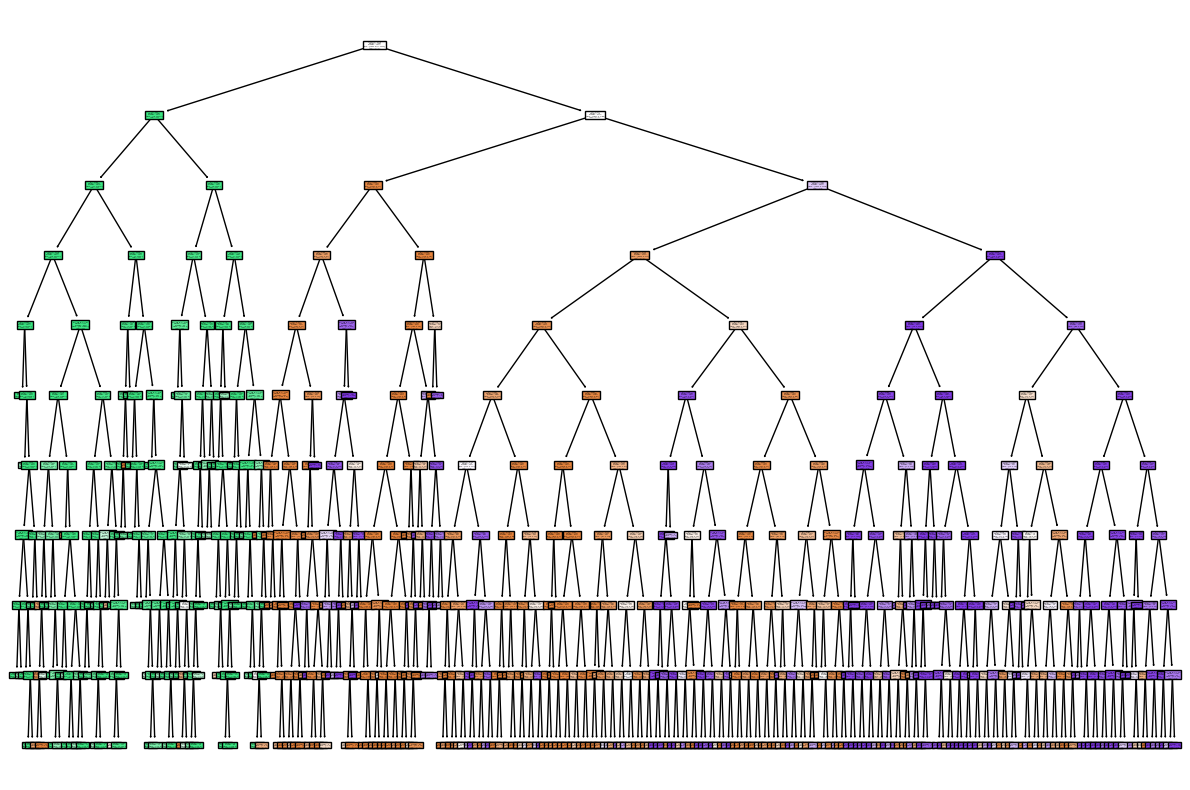

In [55]:
# com 5 iterações: 2 minutos
# best hyperparameters:  {'n_estimators': 25, 'min_samples_leaf': 5, 'max_depth': 10}
# best score:  0.9783591412696847

from sklearn.tree import plot_tree

best_model = random_search.best_estimator_

# List of features
feature_names = ['u', 'g', 'r', 'i', 'z', 'spec_obj_ID', 'redshift']

# List of classes
class_names = ['GALAXY', 'QSO', 'STAR']

# Plot de uma árvore específica (primeira árvore)
plt.figure(figsize=(15, 10))
plot_tree(best_model.estimators_[0], filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


In [53]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1: {:.2f}'.format(f1))

# Generate a classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification report:')
print(report)

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1: 0.98
Classification report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      9977
           2       0.99      1.00      1.00     10244
           3       0.98      0.97      0.97     10196

    accuracy                           0.98     30417
   macro avg       0.98      0.98      0.98     30417
weighted avg       0.98      0.98      0.98     30417



<Axes: >

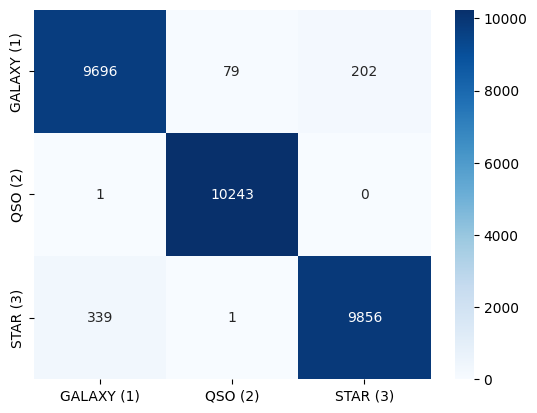

In [54]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Create a list of labels
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)